In [ ]:
# Uninstall the current TensorFlow
!pip uninstall tensorflow -y

# Install the desired version
!pip install tensorflow==2.15.0

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 59.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling

Epoch 1/100
342/342 [==============================] - 1s 2ms/step - loss: 0.1030 - val_loss: 0.0579
Epoch 2/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0365 - val_loss: 0.0269
Epoch 3/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0191 - val_loss: 0.0185
Epoch 4/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0146 - val_loss: 0.0162
Epoch 5/100
342/342 [==============================] - 1s 2ms/step - loss: 0.0133 - val_loss: 0.0154
Epoch 6/100
342/342 [==============================] - 1s 2ms/step - loss: 0.0125 - val_loss: 0.0143
Epoch 7/100
342/342 [==============================] - 1s 2ms/step - loss: 0.0120 - val_loss: 0.0142
Epoch 8/100
342/342 [==============================] - 1s 2ms/step - loss: 0.0115 - val_loss: 0.0135
Epoch 9/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0113 - val_loss: 0.0132
Epoch 10/100
342/342 [==============================] - 1s 2ms/step - loss: 0.0109 - val_lo

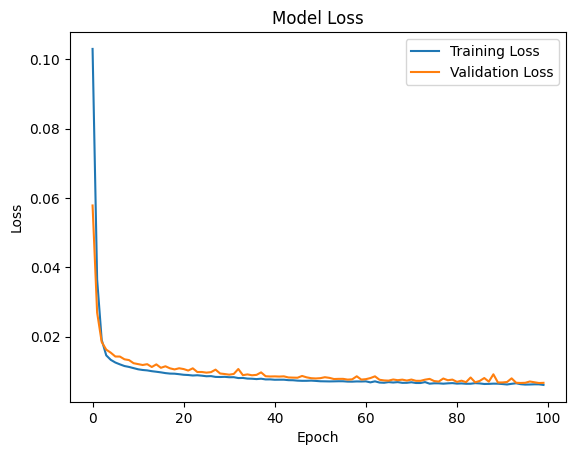

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Load the data
file_path = '/content/CO_CO2_SMR.xlsx'
data = pd.read_excel(file_path)

# Convert the data to a numpy array
data_array = data.to_numpy()

# Extract input (first 4 columns) and output (5th column, index 4)
X = data_array[:, :4]
y = data_array[:, 4]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Print the first 10 values of X
#print("First 10 values of y (target variable):", X[:10])
# Print the first 10 values of y
#print("First 10 values of y (target variable):", y[:10])

# Define the deep neural network model
model = Sequential([
    Dense(5, input_dim=4, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'),
    Dense(5, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'),
    Dense(5, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'),
    Dense(1, activation='linear')
])

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=3, validation_split=0.2)

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate R-squared for the predictions
r_squared = r2_score(y_test, y_pred)
print("R-squared on Testing Set:", r_squared)

# Inverse scale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Print the actual and predicted values for comparison
table = PrettyTable(['Actual Output', 'Predicted Output'])
for i in range(len(y_test_rescaled.flatten())):
    table.add_row([y_test_rescaled.flatten()[i], y_pred_rescaled.flatten()[i]])
print(table)

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# Save the model to a file
model.save('CO_SMR.keras')

Epoch 1/100
342/342 [==============================] - 1s 2ms/step - loss: 0.1111 - val_loss: 0.0654
Epoch 2/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0482 - val_loss: 0.0372
Epoch 3/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0318 - val_loss: 0.0275
Epoch 4/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0252 - val_loss: 0.0230
Epoch 5/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0217 - val_loss: 0.0201
Epoch 6/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0193 - val_loss: 0.0187
Epoch 7/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0177 - val_loss: 0.0170
Epoch 8/100
342/342 [==============================] - 1s 2ms/step - loss: 0.0165 - val_loss: 0.0159
Epoch 9/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0156 - val_loss: 0.0152
Epoch 10/100
342/342 [==============================] - 0s 1ms/step - loss: 0.0150 - val_lo

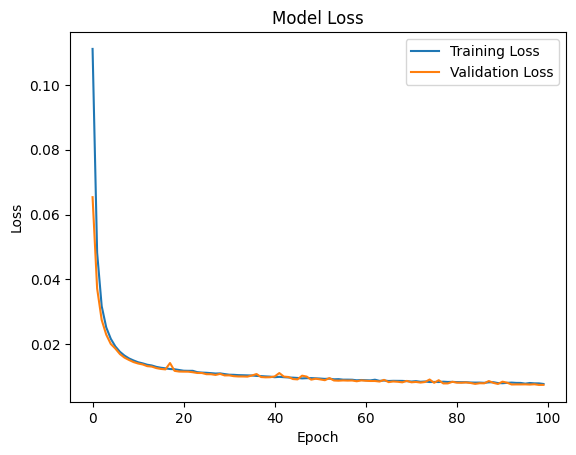

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Load the data
file_path = '/content/CO_CO2_SMR.xlsx'
data = pd.read_excel(file_path)

# Convert the data to a numpy array
data_array = data.to_numpy()

# Extract input (first 4 columns) and output (6th column, index 5)
X = data_array[:, :4]
y = data_array[:, 5]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Print the first 10 values of X
#print("First 10 values of y (target variable):", X[:10])
# Print the first 10 values of y
#print("First 10 values of y (target variable):", y[:10])

# Define the deep neural network model
model = Sequential([
    Dense(5, input_dim=4, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'),
    Dense(5, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'),
    Dense(5, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'),
    Dense(1, activation='linear')
])

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)

# Train the model on the training set
history = model.fit(X_train, y_train, epochs=100, batch_size=3, validation_split=0.2)

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error on Testing Set:", mse)

# Use the trained model to make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate R-squared for the predictions
r_squared = r2_score(y_test, y_pred)
print("R-squared on Testing Set:", r_squared)

# Inverse scale predictions and actual values
y_pred_rescaled = scaler_y.inverse_transform(y_pred)
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Print the actual and predicted values for comparison
table = PrettyTable(['Actual Output', 'Predicted Output'])
for i in range(len(y_test_rescaled.flatten())):
    table.add_row([y_test_rescaled.flatten()[i], y_pred_rescaled.flatten()[i]])
print(table)

# Plot the loss curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [ ]:
# Save the model to a file
model.save('CO2_SMR.keras')

In [ ]:
import tensorflow as tf

In [ ]:
CO2_model = tf.keras.models.load_model('CO2_SMR.keras')

In [ ]:
import numpy as np
# Define the new input
new_input = np.array([[100, 315, 1000, 38.2]])

# Scale the new input using the previously fitted scaler
new_input_scaled = scaler_X.transform(new_input)

# Use the model to predict the scaled output for the new input
new_pred_scaled = model.predict(new_input_scaled)

# Inverse transform the scaled prediction to obtain the actual output value
new_pred = scaler_y.inverse_transform(new_pred_scaled)

print("Predicted output for (100, 315, 1000, 38.2):", new_pred[0, 0])


1/1 [==============================] - 0s 14ms/step
Predicted output for (100, 315, 1000, 38.2): 100.57502
